## Introducción a NetworkX

NetworkX es una biblioteca para la creación y manipulación de grafos. Dado que para el trabajo final vamos a estar trabajando con link prediction, los datos los vamos a tener en forma de grafo. En este contexto, en esta notebook vamos a ver:

* Cómo levantar un grafo desde un archivo.
* Cómo recorrer los nodos y arcos de un grafo accediendo a sus atributos.
* Cómo chequear la existencia de un arco.
* Cómo calcular métricas referidas a los nodos, arcos o incluso al grafo completo.
* Cómo calcular métricas de semejanza entre nodos (útiles para recomendación topológica).
* Cómo encontrar comunidades en un grafo.

Una muy buena y completa fuente de información es la [documentación](https://networkx.org/documentation/stable/) de la biblioteca. Para cada uno de los métodos cuenta con ejemplos de uso.

El grafo que van a tener para el trabajo está en formato ``NetworkX`` con lo que vamos a probar un poquito esa biblioteca. Lo primero, si no la tienen ya instalada, ejecutar ``pip install networkx``. Luego, ya podemos importarla normalmente.

In [ ]:
import networkx as nx

Para poder levantar el grafo, también vamos a necesitar tener disponible la biblioteca ``pickle5``. Si no la tienen ya instalada, ejecutar ``pip install pickle5``. Esta biblioteca además de permitirnos leer y escribir archivos ``pickle``, también nos deja salvar problemas que puedan aparecer por intercambiar archivos entre versiones no tan compatibles de Python.

In [ ]:
import pickle5 as pickle

#### Lectura del grafo

Ahora sí, vamos a leer el grafo. Particularmente, vamos a estar trabajando con un grafo dirigido ponderado, es decir, un grafo donde los arcos tienen dirección (por ejemplo, no es lo mismo el arco ``A -> B`` que el arco ``B -> A``) y peso.

Por supuesto que también se pueden crear los grafos desde cero y agregar manualmente nodos y arcos, pero en este caso, ya nos viene lista la estructura.

Primero, descargamos el grafo. Si no la tienen ya instalada, ejecutar ``pip install gdown``.

In [ ]:
import gdown
url = 'https://drive.google.com/uc?export=download&id=1fuDhHsO8dLofR-VSlL55b_m9CIMtrGv_'

datapath =  "graph_example.gpickle"
gdown.download(url, datapath, quiet=False)

In [ ]:
file = open(datapath,'rb')
graph = pickle.load(file)
file.close()

graph.number_of_nodes(),graph.number_of_edges()

Vamos a dibujar el grafo que acabamos de levantar. El ``layout`` sirve para determinar la "forma" que va a adoptar el grafo cuando lo dibujamos. Hay varios de los cuales elegir, por ejemplo ``kamada_kawai``, ``spring``, ``random``. Random es uno de los más rápidos (y menos "elegantes").

Tener en cuenta que ``NetworkX`` no es muy amigable para dibujar grafos muy grandes. En ese caso, es mejor utilizar, por ejemplo, ``gephi``, que permite una visualización interactiva.

In [ ]:
import matplotlib.pyplot as plt
limits = plt.axis("off")
pos = nx.random_layout(graph) 
nx.draw_networkx(graph, pos=pos, node_size = 300)

#### Recorrido de nodos y arcos 

Podemos recorrer el grafo tanto a partir de sus nodos como de sus arcos. Hay varias formas de hacerlo, podemos usar la clásica notación de matrix ``[]`` o usar los métodos.

Por defecto la iteración no incluye los datos que puedan contener los nodos o arcos. Para eso, hay dos opciones: 
1. Agregar al método el parámetro ``data=True``.
2. Invocar al método ``data()`` al resultado de obtención de nodos y arcos.

En este caso, los nodos no tienen datos extras, mientras que los arcos tienen su peso.

In [ ]:
for n in graph.nodes().data():
    print(n)

In [ ]:
for e in graph.edges(data=True):
    print(e)

#### Degree

El degree de un nodo indica la cantidad de nodos adyacentes que tiene. 

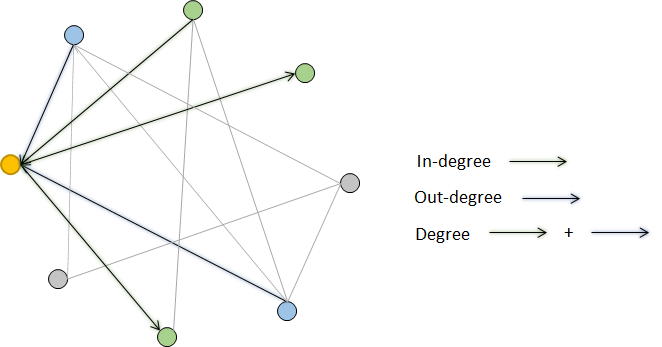

Acepta parámetros:

* ``nbunch``. Opcional. Un único nodo o un container con los nodos para los cuales hacer el cálculo. Por defecto considera todos los nodos.
* ``weight``. El nombre del atributo de peso de los arcos. Por default ``None`` y cada arco vale 1. En caso contrario, el ``degree`` de un nodo es la suma de los pesos de sus arcos adyacentes.

Retorna una vista de un diccionario ``{nodo : degree}``.

In [ ]:
graph.degree()

Independientemente de que el grafo sea dirigido, ``degree`` devuelve el valor considerando un grafo no dirigido. Si se quiere considerar el ``degree`` dirigido hay que usar ``in_degree`` (cantidad de arcos que llegan a un nodo) u ``out_degree`` (cantidad de arcos que salen de un nodo).

In [ ]:
graph.in_degree(),graph.out_degree()

#### Matriz de adjacencia

En algunos casos (por ejemplo las técnicas que ya vimos de filtrado colaborativo o de factorización de matrices) no es posible utilizar el grafo así como está, sino que debemos transformarlo en una representación más amigable, como la matriz de adyacencia.

Como ya vimos, la matriz de adyacencia es un arreglo de dos dimensiones de tamaño $cantidad~de~nodos~x~cantidad~de~nodos$, donde el valor será $1$ (o el peso del arco) si los nodos se encuentran relacionados o $0$ en el caso contrario. La matriz será simétrica en el caso de un grafo no dirigido.

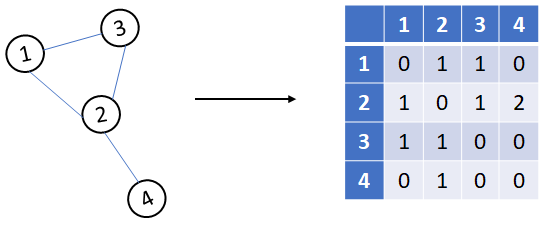

Acepta parámetros:
* ``G``. Grafo, único parámetro obligatorio.
* ``nodelist``. Opcional. Orden en el cual ubicar los nodos en la matriz. Si no se especifica, se considerará a los nodos en el orden retornado por ``G.nodes()``.
* ``weight``. Opcional. El nombre del atributo de peso a utilizar. Si es ``None``, se considerará una matriz binaria.

La matriz será retornada en una representación ``sparse``, para hacerla densa hay que invocar a ``toarray``. 

In [ ]:
nx.linalg.graphmatrix.adjacency_matrix(graph).toarray()

#### Chequear existencia de nodos y arcos

Podemos preguntar tanto por la existenca de nodos, como de arcos. Hay varias opciones.
1. Podemos utilizar el ``in``.
2. Podemos utilizar los métodos dedicados: ``has_edge`` y ``has_node``.

In [ ]:
graph.has_node(242944499), 242944499 in graph, 242944499 in graph.nodes()

In [ ]:
graph.has_edge(18267131,705706292), (18267131,705706292) in graph.edges()

#### Métricas de nodos y arcos

Las métricas de centralidad constituyen una herramienta importante para analizar los grafos desde un punto de vista topológico.

Las métricas de centralidad identifican a los nodos más importantes dentro de un grafo. Las aplicaciones más importantes incluyen, por ejemplo, identificar a las personas más influyendes de una red social, determinar nodos críticos en una infraestructura, detectar qué nodos tienen más probabilidades en propagar enfermedades, ... Estas métricas permiten repsonder a "Qué caracteriza a un nodo importante?" asignado valores a dichos nodos los cuales pueden utilizados para generar un ranking y así identificar a los más importantes.

La palabra "importancia" puede dar lugar a una gran variedad de interpretaciones, lo que da lugar a diversas definiciones de centralidad. En principio, se consideran dos alternativas. En la primera, se mide la importancia en relación al flujo (por ejemplo, de información) en un grafo. En la segunda, se puede considerar el involucramiento de los nodos en la cohesividad del grafo. Estas variantes suelen ser excluyentes, es decir, lo que resulta apropiado para una, puede que no lo sea para la otra.

En la siguiente figura hay un resumen de algunas de las métricas que se pueden calcular. Los nodos verdes son aquellos que tendrían un valor algo, mientras que los rojos aquellos que tendrían uno bajo.

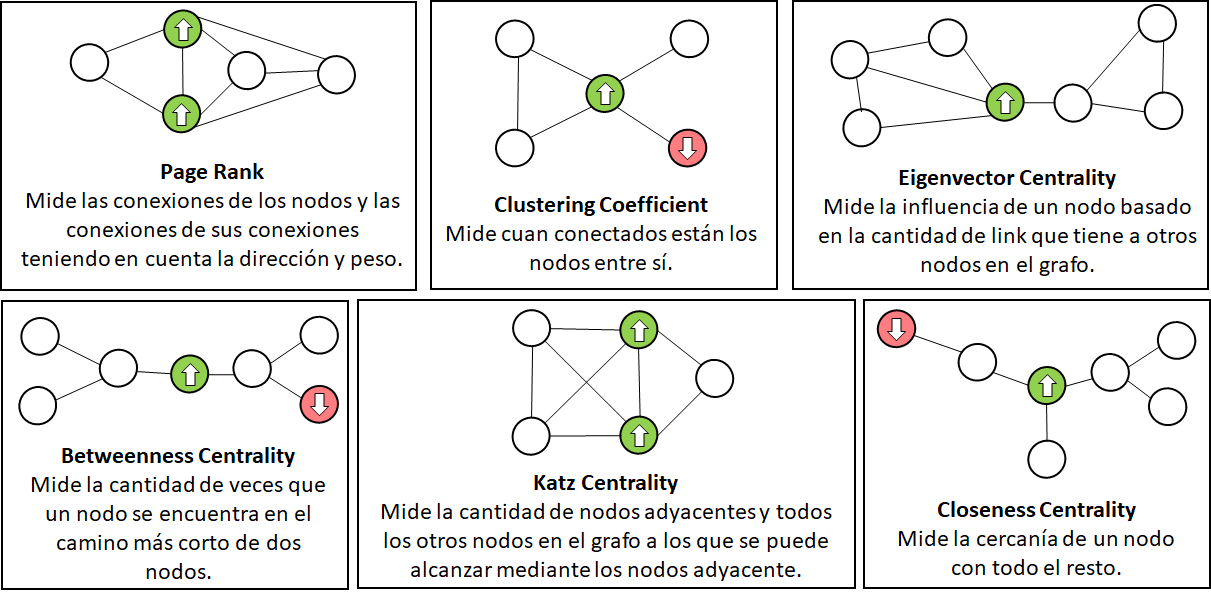

Para más detalle en relación a las métricas que se pueden calcular, consultar la [documentación](https://networkx.org/documentation/stable/reference/algorithms/centrality.html).

Por lo general, estas métricas aceptan tres parámetros:

* ``G``. El grafo sobre el cual realizar los cálculos. Único obligatorio.
* ``nodes``. Opcional. Contenedor de los nodos a incluir en el cálculo. Por defecto se calcula sobre todos los nodos.
* ``weight``. Opcional. Para aquellas métricas que soportan la consideración de peso en su cálculo, el nombre del atributo conteniendo el peso de los arcos.

Los métodos retornan un diccionario ``{nodo : score}``.

In [ ]:
vals = nx.algorithms.cluster.clustering(graph)
{k:v for k,v in vals.items() if v > 0}

In [ ]:
vals = nx.algorithms.cluster.clustering(graph,weight='weight') # vean como cambian los valores cuando se considera el peso
{k:v for k,v in vals.items() if v > 0}

#### Métrica de semejanza topológica entre nodos

La forma más sencilla de calcular la semejanza entre dos nodos es considerar aspectos topológicos (dados por las vecindades). Estas semejanzas topológicas son también de las formas más fácil de hacer un sistema de recomendación.

NetworkX ya trae un conjunto de estas métricas implementados:
* ``adamic_adar_index``.
* ``resource_allocation_index``.
* ``jaccard_coefficient``.
* ``preferential_attachment``.
* ``common_neighbor_centrality``.

Por ejemplo, consideremos Jaccard, definido como: 

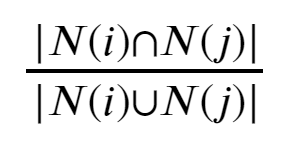


Tenemos el siguiente grafo, vamos a calular el valor de Jaccar para el nodo rojizo y el azul.

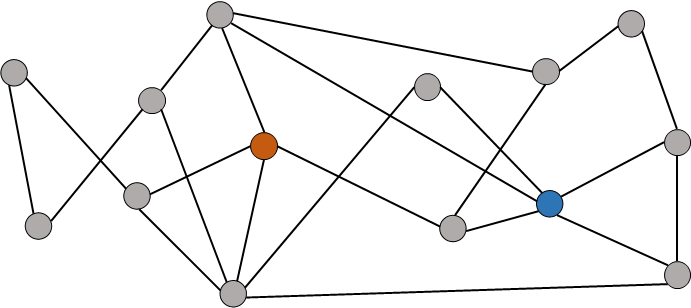

Obtenemos las vecindades:

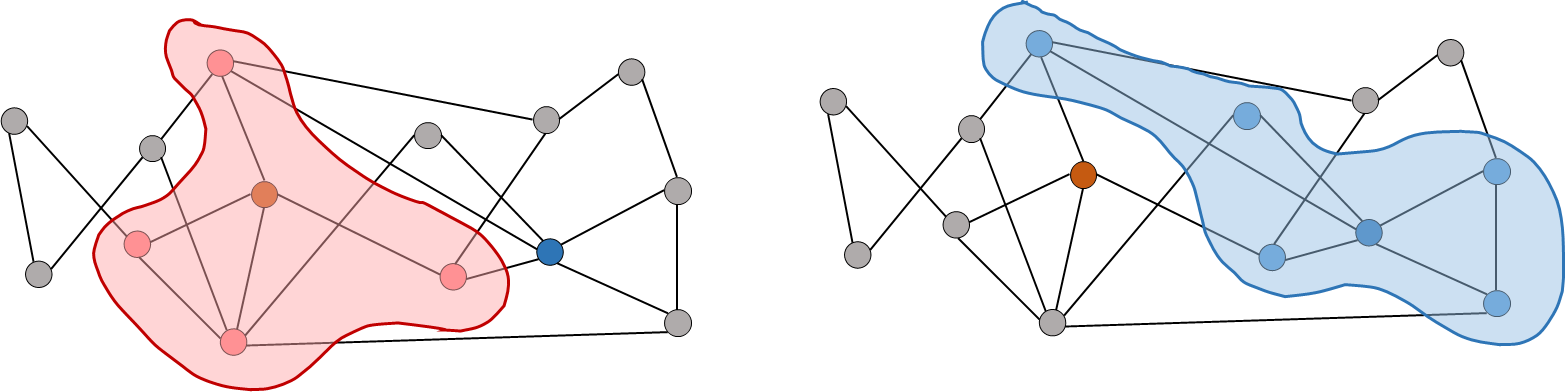

Calculamos la intersección y unión entre las vecindades:

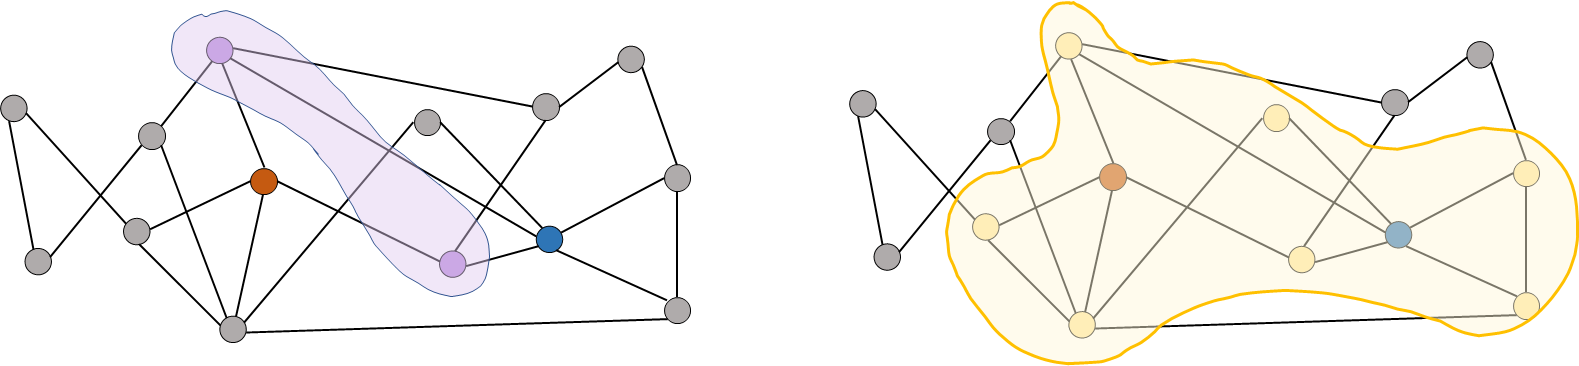

Finalmente, la división entre ambos da como resultado $2/7$.

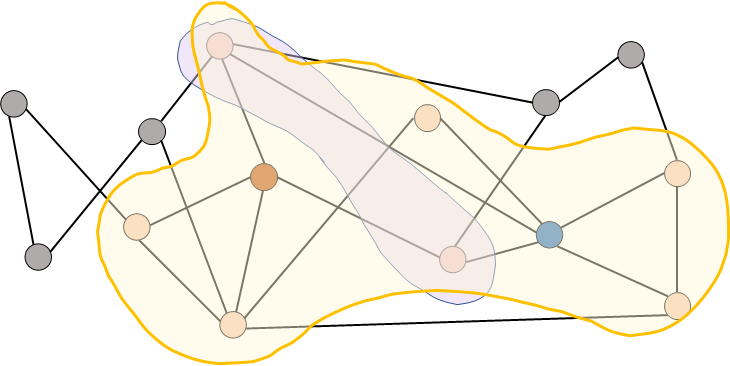

Nota: Estas técnicas consideran que el grafo es no dirigido, si se desea tener en cuenta la naturaleza dirigida del grafo, es necesario implementar la métrica manualmente.

Para más información, consultar la [documentación](https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html).

Acepta parámetros (los parámetros pueden variar de acuerdo a la técnica):
   
* ``G``. Grafo. Obligatorio
* ``ebunch``. Opcional. Iterable de pares de nodos (es decir, de lo que serían arcos). Si se lo especifica se calculará el score solo sobre esos pares de nodos, caso contrario se calculará sobre el conjunto completo de pares no existentes de arcos. En el caso de nodos muy grandes, por más que se necesite calcularlo para todos los arcos inexistentes, conviene calcular de forma externa dicho conjunto de arcos, dado que el uso de ``G.non_edges()`` resulta muy ineficiente.

Retorna un iterador de tuplas de la forma ``(origen, destino, score)``.

In [ ]:
[x for x in nx.algorithms.link_prediction.adamic_adar_index(graph.to_undirected())]

In [ ]:
[x for x in nx.algorithms.link_prediction.adamic_adar_index(graph.to_undirected(), ebunch=[(35586563,18029328),(35586563,27413440)])]

#### Detección de comunidades

Una comunidad se define como _un subconjunto de nodos en un grafo que se encuentran densamente conectados entre ellos y "ligeramente" conectados con otros nodos en las otras comunidades en el msimo grafo_.

Se dice que un grafo tiene una estructura de comunidades si los nodos pueden ser fácilmente agrupados en conjuntos de nodos (potencialmente superpuestos), de forma que cada set de nodos es internamente densamente conectado.

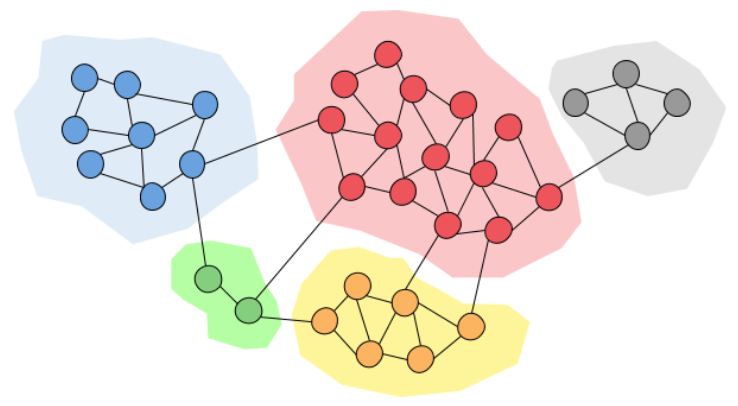

Para algunas aplicaciones puede ser interesante descubrir la estructura de comunidades subyacente al grafo. Las técnicas de detección de comunidades se clasifican principalmente en dos tipos:

* **Aglomerativas**. Se comienza con un grafo vacío que consiste en los nodos del grafo original pero sin arcos. Luego, se van agregando los arcos uno a uno, desde los arcos más "fuertes" a los más "débiles". Esa fortaleza, debilidad o peso del arco pueden ser calculadas de diversas formas.

* **División**. Se comienza por el grafo completo y se van quitando iterativamente los arcos. En cada iteración se quita el arco de mayor peso y se re-calculan los pesos de los arcos para la próxima iteración. Luego de una determinada cantidad de iteraciones, se obtienen las comunidades de nodos densamente conectados.

``NetworkX`` soporta diferentes técnicas. Para más información, referirse a la [documentación](https://networkx.org/documentation/stable/reference/algorithms/community.html). La mayoría de estas técnicas no soportan grafos dirigidos por defecto, lo que significa que hay que transformarlos en no dirigidos invocando el método ``to_undirected``. Por otra parte, las técnicas difieren en el formato de los datos de salida. Por ejemplo, pueden devolver:
* Un diccionario del tipo ``{ nodo, nro_community }`` (como Louvain).
* Una lista de sets de nodos ``[{nodos}]`` (como greedy_modularity).
* Un generator de sets de nodos ``{nodos}`` (como label propagation).

In [ ]:
nx.algorithms.community.greedy_modularity_communities(graph.to_undirected())

In [ ]:
generator = nx.algorithms.community.label_propagation_communities(graph.to_undirected())

# para ejecutar, comentar alguna de las dos alternativas.

# al generator se lo puede consumir en una iteración:
[com for com in generator]

# o podemos transformarlo directamente en una lista de los elementos
list(generator)

Por su parte, Louvain (uno de las técnicas mas utilizadas para la detección de comunidades) no viene directamente disponible en ``NetworkX``, sino que es necesario instalar otro paquete. En este caso, vamos a utilizar el paquete ``python-louvain``, el cual vamos a instalar ejecutando ``pip install python-louvain``.

In [ ]:
from community import community_louvain

In [ ]:
partition = community_louvain.best_partition(graph.to_undirected())
partition